In [21]:
from bioinfokit.analys import stat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)
OUTDATED_IGNORE=1

In [22]:
data_frame = pd.read_csv('./exams.csv')
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


The "Students Performance in Exams" dataset contains of the marks secured by the students in various subjects. The dataset was downloaded from kaggle.com and is available here: https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams

The data in the dataset is divided into 8 columns, each containing 1000 entries:
1. gender - gender of the student - categorical data
2. race_ethnicity - information about race coded as groups A-E - categorical data
3. parental_education - education level of student's parents - categorical data
3. lunch - infomation about lunch - 2 otpions (standard and free/reduced) - categorical data
3. test_preparation_course - information about whether a test preparation course was taken - categorical data
4. math_score - score of the math exam - numerical data
4. reading_score - score of the reading exam - numerical data
3. writing_score - score of the writing exam - numerical data

In [23]:
# take a look at first ten entries in the dataset
data_frame.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
5,female,group D,high school,standard,none,63,77,76
6,female,group A,bachelor's degree,standard,none,62,59,63
7,male,group E,some college,standard,completed,93,88,84
8,male,group D,high school,standard,none,63,56,65
9,male,group C,some college,free/reduced,none,47,42,45


In [24]:
# check missing entires in the dataset
data_frame.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

From the above `info` tabel we can see that there are no missing entries in any column.

In [25]:
#replaced whitespaces in the columns names with "_" 
data_frame=data_frame.rename(columns={"race/ethnicity":"race_ethnicity","parental level of education":"parental_education",
                                      "test preparation course":"test_preparation_course","math score":"math_score",
                                      "reading score":"reading_score","writing score":"writing_score"})
data_frame.head(10)

,gender,race_ethnicity,parental_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
5,female,group D,high school,standard,none,63,77,76
6,female,group A,bachelor's degree,standard,none,62,59,63
7,male,group E,some college,standard,completed,93,88,84
8,male,group D,high school,standard,none,63,56,65
9,male,group C,some college,free/reduced,none,47,42,45


In [26]:
data_frame.to_csv('math.csv')

### Gender of the students

In [27]:
data_frame['gender'].describe()

count     1000
unique       2
top       male
freq       517
Name: gender, dtype: object

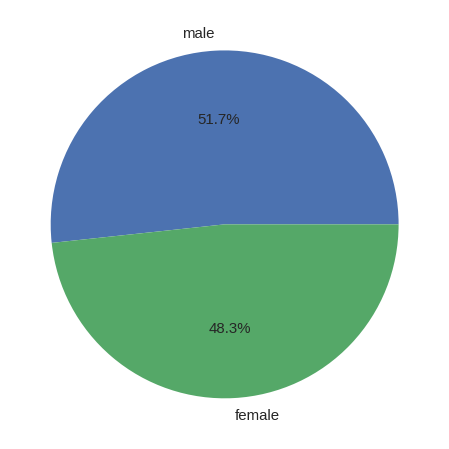

In [28]:
gender = data_frame['gender'].value_counts()
plt.pie(gender, labels=['male', 'female'], autopct='%1.1f%%', textprops={'fontsize': 15})
plt.show()

In [29]:
gender

male      517
female    483
Name: gender, dtype: int64

The gender of the students - there are 517 male students and 483 females students.

### Race/ethnicity

One of information about students is their race/ethnicity. In the dataset, this variable was coded with letters from A to E - there are 5 groups.

In [30]:
ethnicity = data_frame['race_ethnicity'].value_counts()
ethnicity = ethnicity.reset_index()

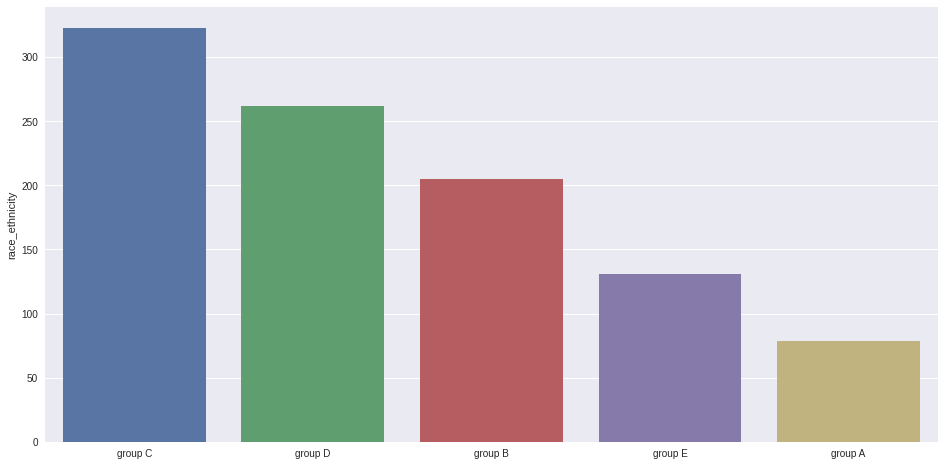

In [31]:
sns.barplot(data=ethnicity, x='index', y='race_ethnicity')
plt.xlabel(None)
plt.show()

In [32]:
ethnicity

,index,race_ethnicity
0,group C,323
1,group D,262
2,group B,205
3,group E,131
4,group A,79


The largest number of students is in group C - 323 students belong to it. Next are groups: D (262 students), C (205 students), B (131 students). The fewest students are in group A - only 79 students belong to it.

### Parental education level
The parental_education column contains information about the education level of students' parents.

In [33]:
parents_education = data_frame['parental_education'].value_counts()
parents_education = parents_education.reset_index()

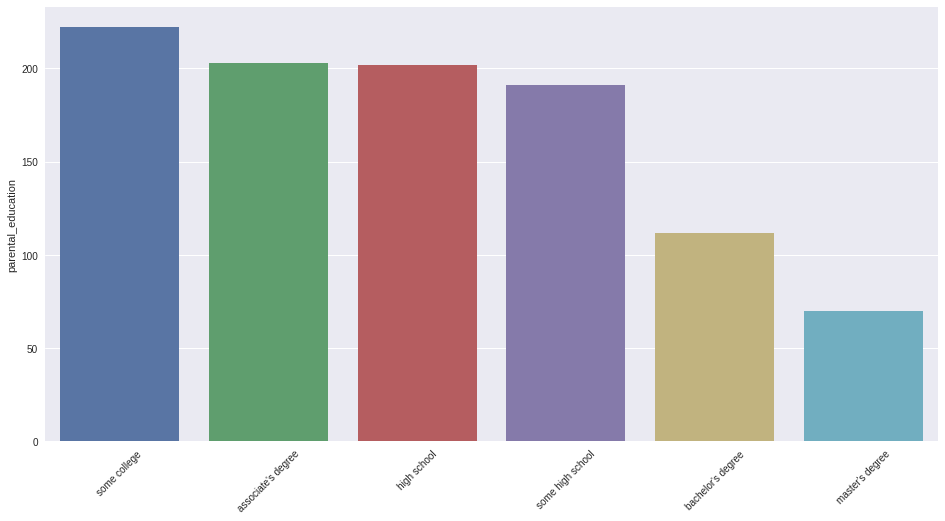

In [34]:
sns.barplot(data=parents_education, x='index', y='parental_education')
plt.xticks(rotation=45)
plt.xlabel(None)
plt.show()

In [35]:
parents_education

,index,parental_education
0,some college,222
1,associate's degree,203
2,high school,202
3,some high school,191
4,bachelor's degree,112
5,master's degree,70


The most common parental education was "some college" (I read this as uncompleted college degree) - 222. Almost the same results have "associate's degree" (title obtained between high school and before bachelor's degree) and "high school" (completed high school) - 203 and 202 observations, respectively. The least common levels of education were "bachelor's degree" with 112 observations and master's degree with 70 observations.

### Lunch
The "lunch" column indicates whether lunch was paid for as standard (standard), or whether it was free or subsidized (free/reduced).

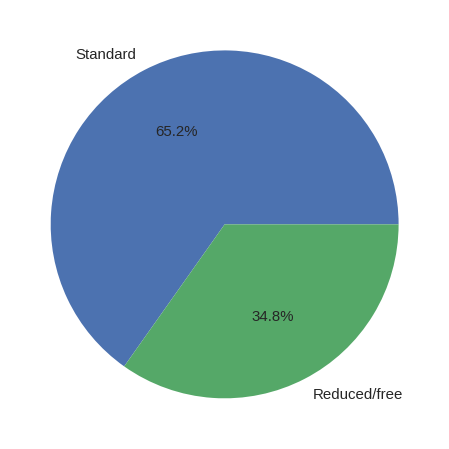

In [36]:
lunch = data_frame['lunch'].value_counts()
plt.pie(lunch, labels=['Standard', 'Reduced/free'], autopct='%1.1f%%', textprops={'fontsize': 15})
plt.show()

In [37]:
lunch

standard        652
free/reduced    348
Name: lunch, dtype: int64

Most of the students-652-had lunch with a standard fee. For 348 students, lunch was subsidized or completely free. This is 65.2% and 34.8%, respectively.

### Test preparation course
Some students have taken a test preparation course. Information about whether a student has completed such a course or not is in the 'test_preparation_course' column.

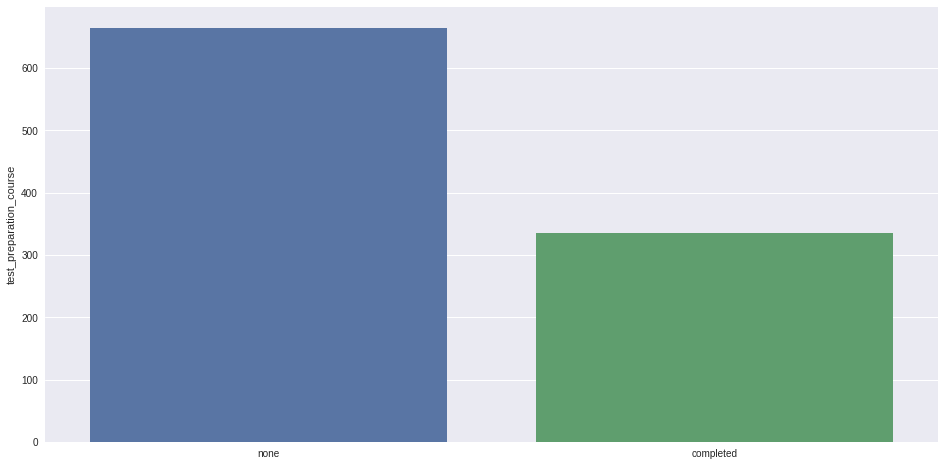

In [38]:
preparation = data_frame['test_preparation_course'].value_counts()
preparation = preparation.reset_index()
sns.barplot(data=preparation, x='index', y='test_preparation_course')
plt.xlabel(None)
plt.show()

In [39]:
preparation

,index,test_preparation_course
0,none,665
1,completed,335


The majority of students (665) did not complete the test preparation course, but 335 students completed the course.

### Score of the math exam

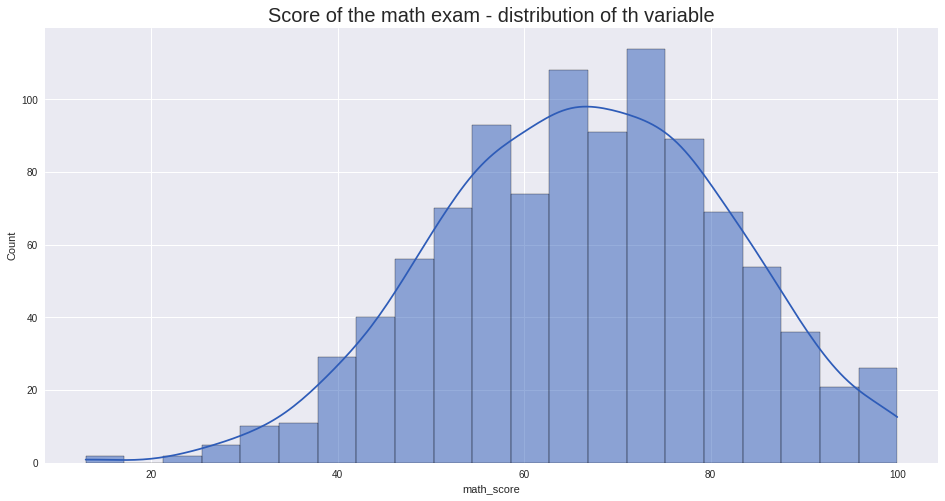

In [40]:
sns.histplot(x='math_score',data=data_frame, kde=True, color='#2e5cb8')
plt.title('Score of the math exam - distribution of th variable', size=20)
plt.show()

In [41]:
data_frame['math_score'].describe()

count    1000.000000
mean       66.396000
std        15.402871
min        13.000000
25%        56.000000
50%        66.500000
75%        77.000000
max       100.000000
Name: math_score, dtype: float64

The distribution of math test scores looks almost like a normal distribution. The average number of points about 66.4 is also very close to the median - 66.5.The lowest score is 13 points and the highest score is 100.The most common results occurred in the range of 60-80.

### Score of the reading exam

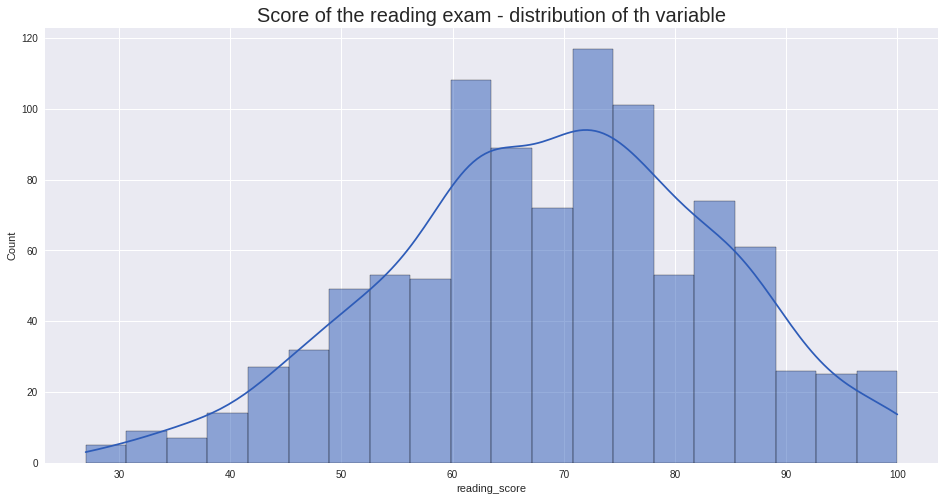

In [42]:
sns.histplot(x='reading_score',data=data_frame, kde=True, color='#2e5cb8')
plt.title('Score of the reading exam - distribution of th variable', size=20)
plt.show()

In [43]:
data_frame['reading_score'].describe()

count    1000.000000
mean       69.002000
std        14.737272
min        27.000000
25%        60.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading_score, dtype: float64

The distribution of score of the reading exam also look normal, but seem to be more varied. The average number of score is higher than that in matamatics, at 69. The median is 70. The lowest value is 27 and the highest is 100.

### Score of the writing exam

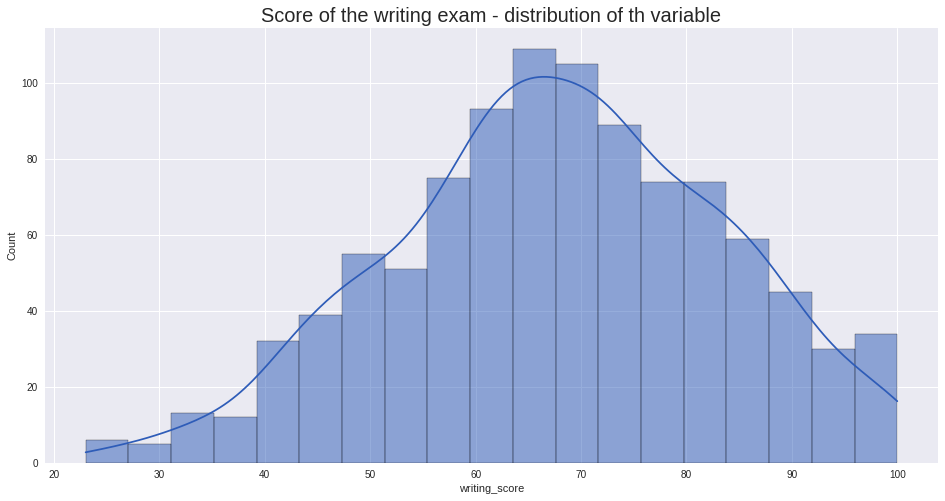

In [44]:
sns.histplot(x='writing_score',data=data_frame, kde=True, color='#2e5cb8')
plt.title('Score of the writing exam - distribution of th variable', size=20)
plt.show()

In [45]:
data_frame['writing_score'].describe()

count    1000.000000
mean       67.738000
std        15.600985
min        23.000000
25%        58.000000
50%        68.000000
75%        79.000000
max       100.000000
Name: writing_score, dtype: float64

The last column in the dataset is the column containing information about the number of points scored on the writing exam. The distribution of the variable also looks normal, and the mean and median are close to each other - 67.7 and 68 points, respectively. The lowest score on the writing test is 23 points, and the highest is 100.

### ANOVA test for average math exam scores in ethnic groups.
In order to perform an ANOVA test, the data must meet the assumptions:
1. The responses for each factor level have a normal population distribution.
2. Homogeneity of variance - homogeneity means that the variance among the groups should be approximately equal.
3. Independence of cases: the sample cases should be independent of each other.


The third of the assumptions, which states the independence of the data, we can already confirm - the data are independent of each other - each student has an independent exam score. Now we will move on to testing the other two assumptions, we will start with the normality of the data. For the purpose of testing the assumptions, I decided to create separate variables for each group. These groups will contain only the exam scores.

In [46]:
group_a = data_frame.loc[data_frame['race_ethnicity']=='group A','math_score']
group_b = data_frame.loc[data_frame['race_ethnicity']=='group B','math_score']
group_c = data_frame.loc[data_frame['race_ethnicity']=='group C','math_score']
group_d = data_frame.loc[data_frame['race_ethnicity']=='group D','math_score']
group_e = data_frame.loc[data_frame['race_ethnicity']=='group E','math_score']
group_a = group_b.reset_index()
group_b = group_b.reset_index()
group_c = group_c.reset_index()
group_d = group_d.reset_index()
group_e = group_e.reset_index()

groups = ['group_a', 'group_b', 'group_c', 'group_d', 'group_e']

To start, we will plot a histogram for each group to see if each histogram more or less looks like a normal distribution. In addition, to apply the rule of thumb to check the normality of the data under each histogram I will calculate and print the skewness, kurtosis, mean and median for the data in each group.

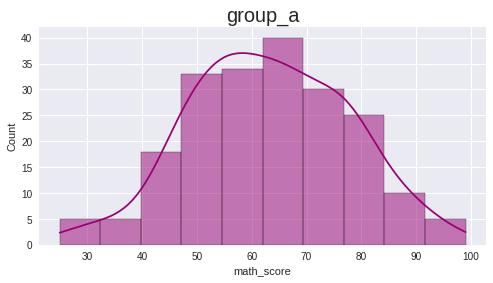

Skewness: -0.032150474820376876 Kurtosis: -0.31559550396811265
Mean: 63.170731707317074 Median: 63.0


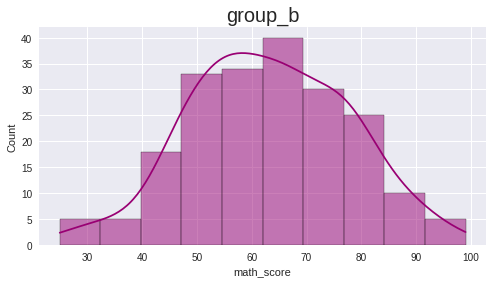

Skewness: -0.032150474820376876 Kurtosis: -0.31559550396811265
Mean: 63.170731707317074 Median: 63.0


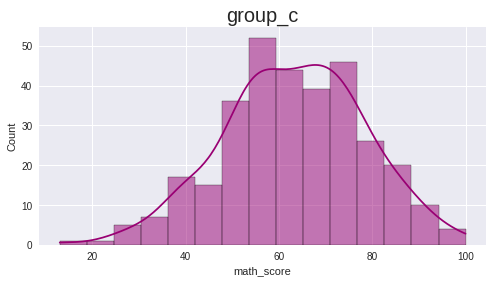

Skewness: -0.17356666446180813 Kurtosis: -0.08295101154507067
Mean: 63.130030959752325 Median: 64.0


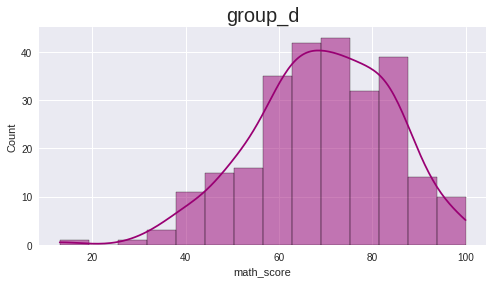

Skewness: -0.40131717462226774 Kurtosis: 0.15669266125401204
Mean: 69.26717557251908 Median: 70.0


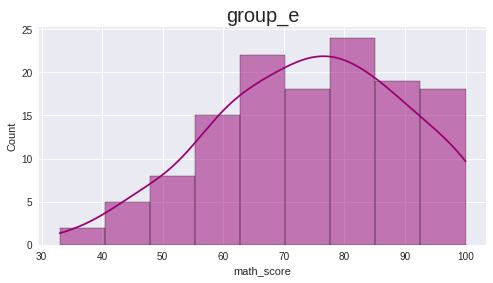

Skewness: -0.25407758871578734 Kurtosis: -0.5467399984934249
Mean: 74.46564885496183 Median: 75.0


In [47]:
for group in groups:
    plt.figure(figsize=(8, 4))
    sns.histplot(x='math_score',data=eval(group), kde=True, color='#990073')
    plt.title(group, size=20)
    plt.show()
    print('Skewness:', stats.skew(eval(group)['math_score']), 'Kurtosis:', stats.kurtosis(eval(group)['math_score']))
    print('Mean:', eval(group)['math_score'].mean(),'Median:',eval(group)['math_score'].median())

Each histogram more or less resembles a normal distribution. Checking the normality of the data using the rule of thumb also confirms normality of the data, the skewness and kurtosis in each group is in the interval (-1, 1) and the median and mean are close to each other.

The QQ plot for each group also indicates the normality:

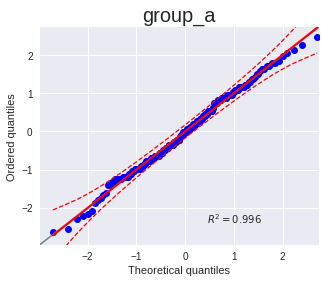

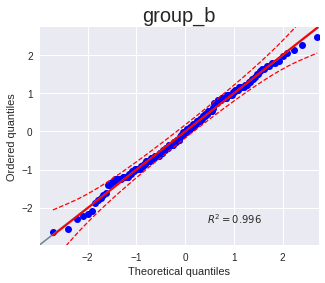

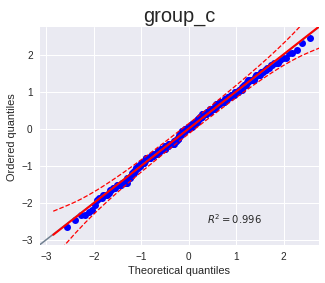

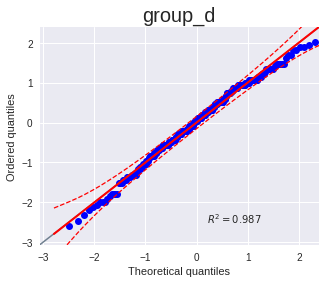

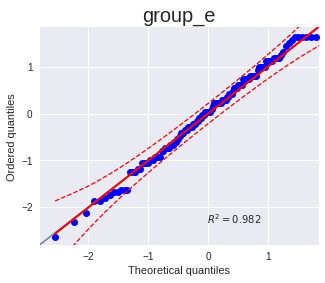

In [154]:
for group in groups:
    pg.qqplot(eval(group)['math_score'], dist='norm')
    plt.title(group, size=20)

Sprawdzając normalność danych metodą kciuka także potwierdzają się nam dane o normalności, skośnośc i kurtoza w każdej z grup jest z przedziału (-1, 1) a mediana i średnia są blisko siebie.

In [48]:
for group in groups:
    alpha = 0.05
    stat, p = stats.shapiro(eval(group)['math_score'])
    if p > alpha:
        print("Probably a normal distribiution")
    else:
        print("Probably not a normal distribiution")
    print(f'{group}:', 'statystyka:', stat, 'p-value:', p)

Probably a normal distribiution
group_a: statystyka: 0.9941601157188416 p-value: 0.6056562662124634
Probably a normal distribiution
group_b: statystyka: 0.9941601157188416 p-value: 0.6056562662124634
Probably a normal distribiution
group_c: statystyka: 0.9959192872047424 p-value: 0.5695543885231018
Probably not a normal distribiution
group_d: statystyka: 0.9869821071624756 p-value: 0.01788172498345375
Probably not a normal distribiution
group_e: statystyka: 0.9776349663734436 p-value: 0.029207957908511162


Finally, on the data for the groups, I performed the Shapiro-Wilk test, which for 3 groups confirmed the normality of the data, and for two groups did not. However, since the rule of thumb is satisfied, and the histogram and QQ plot visually confirm the normality of the data I will assume that the data in the groups are from a normal distribution.

Now we should test the last assumption of the ANOVA test, which is homogeneity of variance - that is, the variance in the groups should be the same. To test this I will perform the Bartlett test.

In [32]:
alpha = 0.05
stat, p = stats.bartlett(group_a['math_score'], group_b['math_score'], group_c['math_score'],
                         group_d['math_score'], group_e['math_score'])
if p > alpha:
    print('The variance among the groups is approximately equal', stat, p)
else:
    print('The variance among the groups is not approximately equal', stat, p)

The variance among the groups is approximately equal 1.558099068187428 0.8163024999326117


The Bartlett test results showed that the variance in the groups was statistically the same.  


Below I plot one big boxplot for all groups. From the graph we can infer that group E got the highest scores of all groups. However, in order to see if this average score in the  groups is statistically different from each other I will perform ANOVA test.

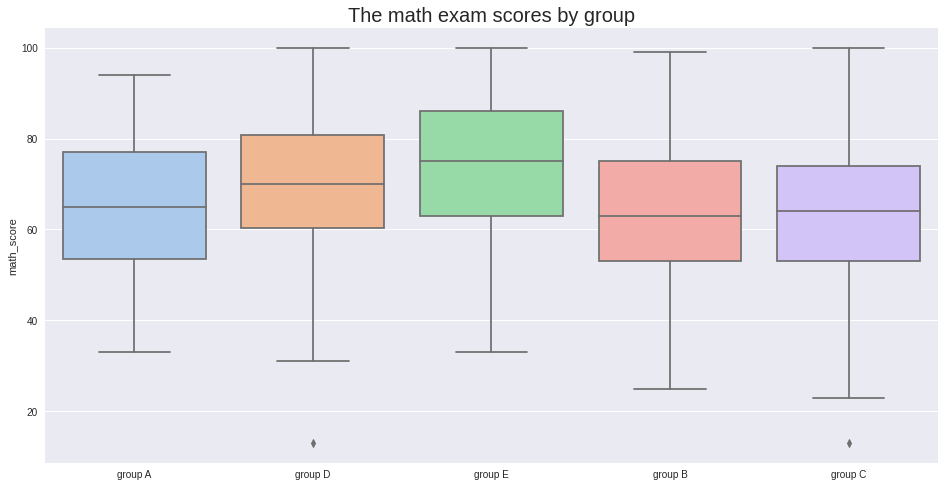

In [33]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='race_ethnicity', y='math_score', data=data_frame, palette='pastel')
plt.xlabel(None)
plt.title('The math exam scores by group', size=20)
plt.show()

In [34]:
alpha = 0.05
f, p = stats.f_oneway(group_a['math_score'], group_b['math_score'], group_c['math_score'],
                         group_d['math_score'], group_e['math_score'])
if p > alpha:
    print('The means of all the groups are equal')
else:
    print('At least one group mean that differs from the rest')
print('stat:',f, 'p-value:',p)

At least one group mean that differs from the rest
stat: 20.537093070137168 p-value: 2.393861281584345e-16


The one-way ANOVA test showed that at least one mean was statistically different from the others.

In [5]:
tukey_data = data_frame[['race_ethnicity', 'math_score']]
tukey_data

,race_ethnicity,math_score
0,group A,67
1,group D,40
2,group E,59
3,group B,77
4,group E,78
...,...,...
995,group C,73
996,group D,85
997,group C,32
998,group C,73


In [6]:
res = stat()
res.tukey_hsd(df=tukey_data, res_var='math_score', xfac_var='race_ethnicity', 
              anova_model='math_score ~ C(race_ethnicity)')
res.anova_summary

/home/sylwia/anaconda3/envs/kurs/lib/python3.9/site-packages/bioinfokit/analys.py:365: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,df,sum_sq,mean_sq,F,PR(>F)
C(race_ethnicity),4.0,16378.386008,4094.596502,18.46563,1.194293e-14
Residual,995.0,220632.797992,221.741506,NaN,NaN


In [7]:
differences_in_groups = res.tukey_summary
differences_in_groups

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,group A,group D,4.051986,-1.171277,9.275249,2.998102,0.212324
1,group A,group E,9.250459,3.453645,15.047273,6.167289,0.001000
2,group A,group B,2.044458,-3.344410,7.433327,1.466226,0.816904
3,group A,group C,2.085159,-3.022561,7.192879,1.577729,0.772209
4,group D,group E,5.198473,0.843968,9.552979,4.613785,0.010038
5,group D,group B,6.096444,2.301899,9.890989,6.209222,0.001000
6,group D,group C,6.137145,2.753732,9.520557,7.010223,0.001000
7,group E,group B,11.294917,6.743088,15.846746,9.589975,0.001000
8,group E,group C,11.335618,7.120401,15.550835,10.393114,0.001000
9,group B,group C,0.040701,-3.593155,3.674556,0.043287,0.900000


The post-hoc test - Tukey came out with the results that the best group was Group E, followed by Group D. That is, what we have seen on the boxplot, now it is confirmed by the Tukey test results.
### Which gender was more likely to attend the test preparation course? 
For this purpose, I will perform the Chi-Square test of independence.

In [49]:
contingency_table = pd.crosstab(data_frame['gender'], data_frame['test_preparation_course'])
contingency_table = contingency_table.reset_index()

In [50]:
contingency_table

test_preparation_course,gender,completed,none
0,female,160,323
1,male,175,342


The contingency table for this data shows that a similar number of male and female students completed the test preparation course: 160 women and 175 men. There is also little difference in the numbers who did not take the course: 323 women and 342 men.

In [51]:
observations = [[160, 323], [175, 342]]

stat, p, dof, expected = stats.chi2_contingency(observations)
  

alpha = 0.05

if p <= alpha:
    print('Gender and preparation course are dependent')
else:
    print('Gender and preparation course are independent')
print('\n statystyka:',stat,'p-value:', p)

Gender and preparation course are independent

 statystyka: 0.03061377578898026 p-value: 0.8611048346396896


The result of the The Chi-Square of independence came out with the results that gender had no effect on whether or not the students completed the course that prepared them for the test.

In [52]:
#The Chi-Square of independence came out with the results that the variables are independent. 
#Let's calculate the Phi-Yule Coefficient (2x2 table)
np.sqrt(stat/(160+323+175+342))
#There is almost no correlation ;)

0.005532971696021972

In [53]:
contingency_table2 = pd.crosstab(data_frame['gender'], data_frame['lunch'])
contingency_table2 = contingency_table2.reset_index()
contingency_table2

lunch,gender,free/reduced,standard
0,female,160,323
1,male,188,329


In [54]:
observations = [[160, 323], [188, 329]]

statystyka, p, dof, expected = stats.chi2_contingency(observations)
  

alpha = 0.05

if p <= alpha:
    print('Gender and preparation course are dependent')
else:
    print('Gender and preparation course are independent')
print('\n',statystyka, p, dof, expected)

Gender and preparation course are independent

 1.0151544790177707 0.31367114418661746 1 [[168.084 314.916]
 [179.916 337.084]]


In [55]:
np.sqrt(statystyka/1000)
#Phi-Yule Coefficient

0.03186148896423032

Out of curiosity, I decided to calculate the V-Cramer coefficient and see if the student's gender and the parents' level of education are dependent on each other.

In [56]:
contingency_table3 = pd.crosstab(data_frame['gender'], data_frame['parental_education'])
contingency_table3 = contingency_table3.reset_index()
contingency_table3

parental_education,gender,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,female,81,58,94,42,100,108
1,male,122,54,108,28,122,83


In [57]:
observations = [[81, 58, 94, 42, 100, 108], [122, 54, 108, 28, 122, 83]]

stats, p, dof, expected = stats.chi2_contingency(observations)
  

alpha = 0.05

if p <= alpha:
    print('Zmienne są od siebie zależne')
else:
    print('Zmnienne są od siebie niezależne')
print('\n statystyka:',stat, 'p-value:',p)

Zmienne są od siebie zależne

 statystyka: 0.03061377578898026 p-value: 0.005530508872636054


In [58]:
# the V-Cramer coefficient
np.sqrt(stats/(1000*(2-1)))
#The correlation is there but it is small

0.1284891387367924

### Does parental education affect the math exam scores?
Let's take another look at the math exam scores and see if parental education has an impact on the number of points scored on the test. The boxplot shows that the highest scores on the test were achieved by children whose parents have a college education and a bachelor's or master's degree. The lowest scores were achieved by children whose parents did not graduate from high school. But is there actually a correlation here? Let's check it with the ANOVA test.

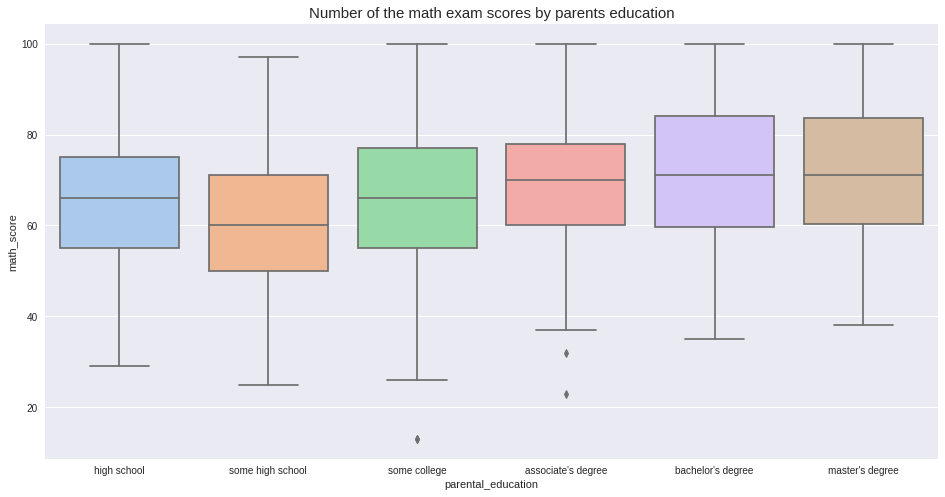

In [63]:
sns.boxplot(x='parental_education', y='math_score', data=data_frame, palette='pastel')
plt.title('Number of the math exam scores by parents education', size=15)
plt.show()

In [64]:
model = ols('math_score ~ parental_education', data=data_frame).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
parental_education,13542.099074,5.0,12.047167,2.400332e-11
Residual,223469.084926,994.0,NaN,NaN


In [65]:
alpha = 0.05
p_value = 2.400332e-11
if p_value <= alpha:
    print('Parents education has significant impact on math test scores')
else:
    print('Parents education has not significant impact on math test scores')

Parents education has significant impact on math test scores


The result of the ANOVA test showed that parents' education level has an impact on students' performance on the math exam.